# Simple Linear Regression
Simple linear regression is a  model that estimates the relationship between an independent variable and an dependent variable using a straight line.
The equation here is y=mx+b

Y= the dependent variable of the regression equation
M= slope of the regression equation
x=independent variable of the regression equation
B= is the estimated intercept (The constant term in regression analysis is the value at which the regression line crosses the y-axis.)
The constant is also known as the y-intercept.


# PROBLEM STATEMENT : 
Predict the percentage of a student with the number of study hours. Here we will use the simple linear regression technique.Let's consider our independent variable as the cause (Hours of Study) and our dependant variable is the effect (Score).

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check the shape of the dataset
data.shape

(25, 2)

In [4]:
#checking the null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#checking the numerical values
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#As there are no null values we can begin with visualisation

# DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

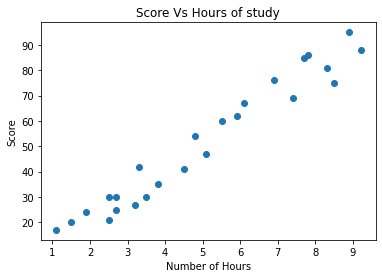

In [7]:
plt.scatter(x=data.Hours, y=data.Scores)
plt.xlabel('Number of Hours')
plt.ylabel('Score')
plt.title('Score Vs Hours of study')
plt.show

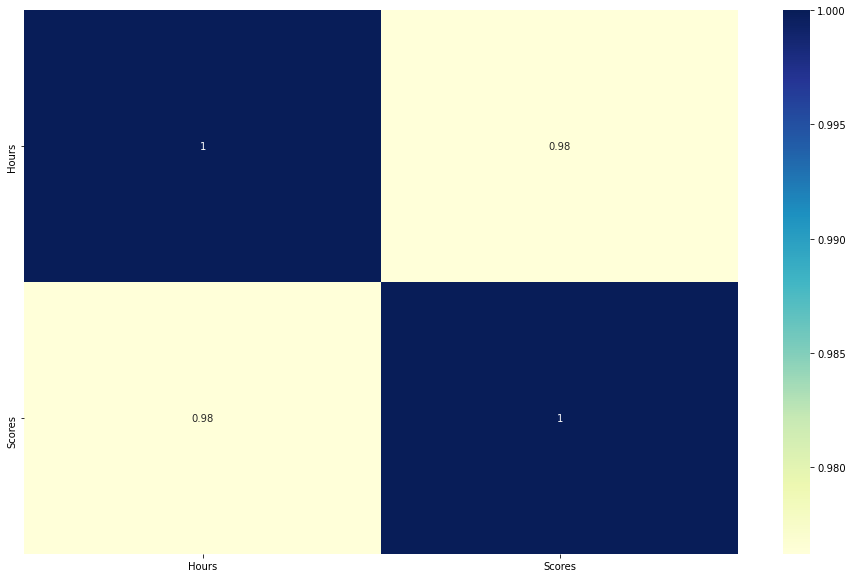

In [8]:
#let's check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [9]:
#From the plots we see there is a correlation between hours of study and score.

# MODEL BUILDING

Let's extract the dependent and independent variables from the given dataset. The independent variable is Hours, and the dependent variable is Score. 

In [23]:
x= data.iloc[:, :-1].values  
y= data.iloc[:, 1].values


In [24]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Now we will split the  variables into the test and training set.Here, we can split our dataset so that we can train our model using a training dataset and then later test the model using a test dataset.

In [11]:
#import the libraries
from sklearn.model_selection import train_test_split

In [12]:
# Splitting the dataset into test and training data
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Fit the Simple Linear Regression to the Training Set

In [13]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

We have now fitted the  regressor object to the training set which helps the model model to easily pick  the correlations between the predictor and target variables.

# Predict on testset result

Now we use  the model to predict on the unseen test and train data. Lets create y_pred, and x_pred, which will contain predictions of test dataset, and prediction of training set respectively. 

In [14]:
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train) 

This helps to generate the variable explorer options that contain score predictions for the training set and test set.

In [15]:
#Lets visualizing the Training set results:

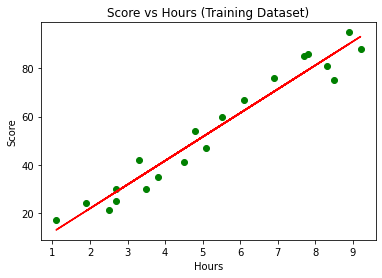

In [16]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Score vs Hours (Training Dataset)")  
plt.xlabel("Hours")  
plt.ylabel("Score")  
plt.show() 

Here we see the values are represented by the green dots and regression line is for the predicted values. The line shows a correlation between the dependent and independent variable.The good fit of the line can be observed by calculating the difference between actual values and predicted values. But as we can see in the above plot, most of the observations are close to the regression line, hence our model is good for the training set.

In [17]:
#visualizing the Test set results:

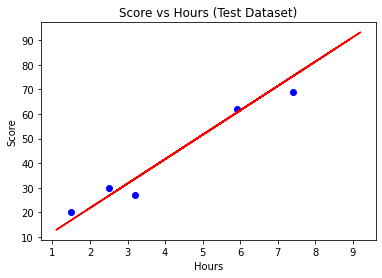

In [22]:

plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Score vs Hours (Test Dataset)")  
plt.xlabel("Hours")  
plt.ylabel("Score")  
plt.show()

In the above plot, the observations are in the blue color, and prediction is given by the red regression line. As we can see, most of the observations are close to the regression line, hence we can say our Simple Linear Regression is a good model and able to make good predictions.

MODEL EVALUATION

In [20]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2 score: 0.9454906892105356


Here, the Mean Absolute Error is on the lower side, indicating that the model gave accurate predictions with fewer outliers. 
The statistical indicator of how much of the variation for a dependent variable in a regression model is explained by one or more independent variables is called (R2).

R-squared shows the accuracy of fit of a regression model. 
Hence, a higher R-squared  of 0.94 indicates the model is a good fit.